<a href="https://colab.research.google.com/github/Jus741/Inventory-Management-System-Project/blob/main/Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Detection Model

This model will be trained using the dataset taken from Kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# File needs to uploaded every runtime
from google.colab import files
uploaded = files.upload()

# Submitted file 'fraudTrain.csv' should be uploaded here
df = pd.read_csv('fraudTrain.csv', encoding='latin-1')

Saving fraudTrain.csv to fraudTrain.csv


The following is a table of the first five rows of the dataset

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


Note that many of these columns do not have labels. This is because the data contains confidential information.

## Preprocessing
First let's get rid of the columns that we will not use

In [ ]:
dfFree = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',])
dfFree

,cc_num,amt,lat,long,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,36.0788,-81.1781,36.011293,-82.048315,0
1,630423337322,107.23,48.8878,-118.2105,49.159047,-118.186462,0
2,38859492057661,220.11,42.1808,-112.2620,43.150704,-112.154481,0
3,3534093764340240,45.00,46.2306,-112.1138,47.034331,-112.561071,0
4,375534208663984,41.96,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,37.7175,-112.4777,36.841266,-111.690765,0
1296671,6011149206456997,51.70,39.2667,-77.5101,38.906881,-78.246528,0
1296672,3514865930894695,105.93,32.9396,-105.8189,33.619513,-105.130529,0
1296673,2720012583106919,74.90,43.3526,-102.5411,42.788940,-103.241160,0


Let's also check for any imbalance between the classifications.

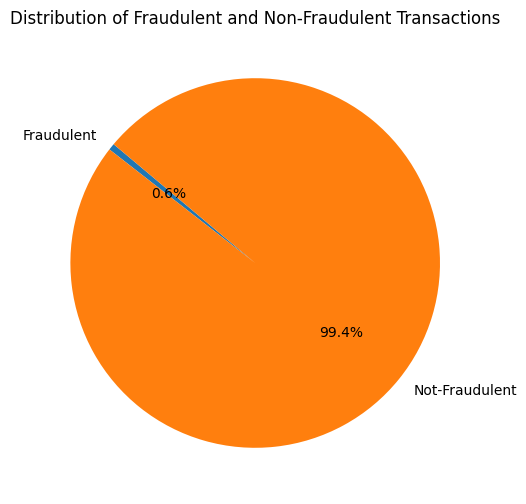

In [ ]:
fraudulent = dfFree[dfFree['is_fraud'] == 1]['is_fraud'].count()
not_fraudulent = dfFree[dfFree['is_fraud'] == 0]['is_fraud'].count()

plt.figure(figsize=(6, 6))
plt.pie([fraudulent, not_fraudulent], labels=['Fraudulent', 'Not-Fraudulent'], autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')

plt.show()

Looks like the data is skewed heavily in the direction of true transactions. Let's rebalance the sample.

In [ ]:
class_counts = dfFree['is_fraud'].value_counts()

minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

num_minority_samples = class_counts[minority_class]
num_majority_samples = class_counts[majority_class]
undersampled_ratio = 1.0

num_samples_to_keep = int(num_minority_samples * undersampled_ratio)

majority_class_samples = dfFree[dfFree['is_fraud'] == majority_class].sample(num_samples_to_keep, random_state=42)

undersampled_df = pd.concat([dfFree[dfFree['is_fraud'] == minority_class], majority_class_samples])

undersampled_df = undersampled_df.sample(frac=1, random_state=42)

Now that we have gotten rid of all irrelevant data, we can begin working on the numbers.

First we will check for missing data in transaction rows.

In [ ]:
undersampled_df.isnull().sum()

cc_num        0
amt           0
lat           0
long          0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

Since we've confirmed there are no absent cells, let's move on to deal with outliers in the data.

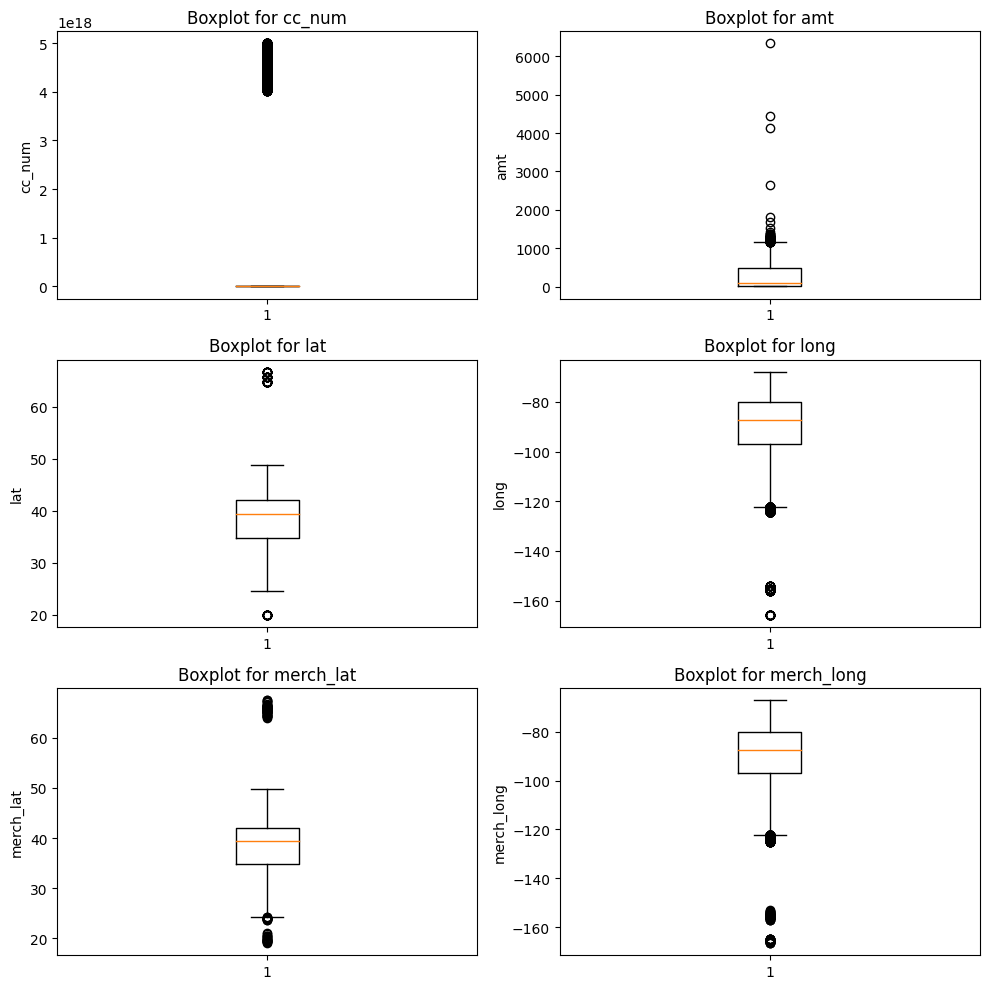

In [ ]:
plotting = ['cc_num', 'amt', 'lat', 'long', 'merch_lat', 'merch_long']
num_plots = len(plotting)
num_rows = int((num_plots + 1) / 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column in enumerate(plotting):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.boxplot(undersampled_df[column])
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel(column)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

As we can see from these boxplot charts, outliers exist in the data. Let's remove the data that exceeds the .25 and .75 percentile.

In [ ]:
df_no_outliers = undersampled_df.copy()

numeric_columns = undersampled_df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    Q1 = undersampled_df[column].quantile(0.25)
    Q3 = undersampled_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]

Now let's check a column to see if we've gotten rid of most outliers.

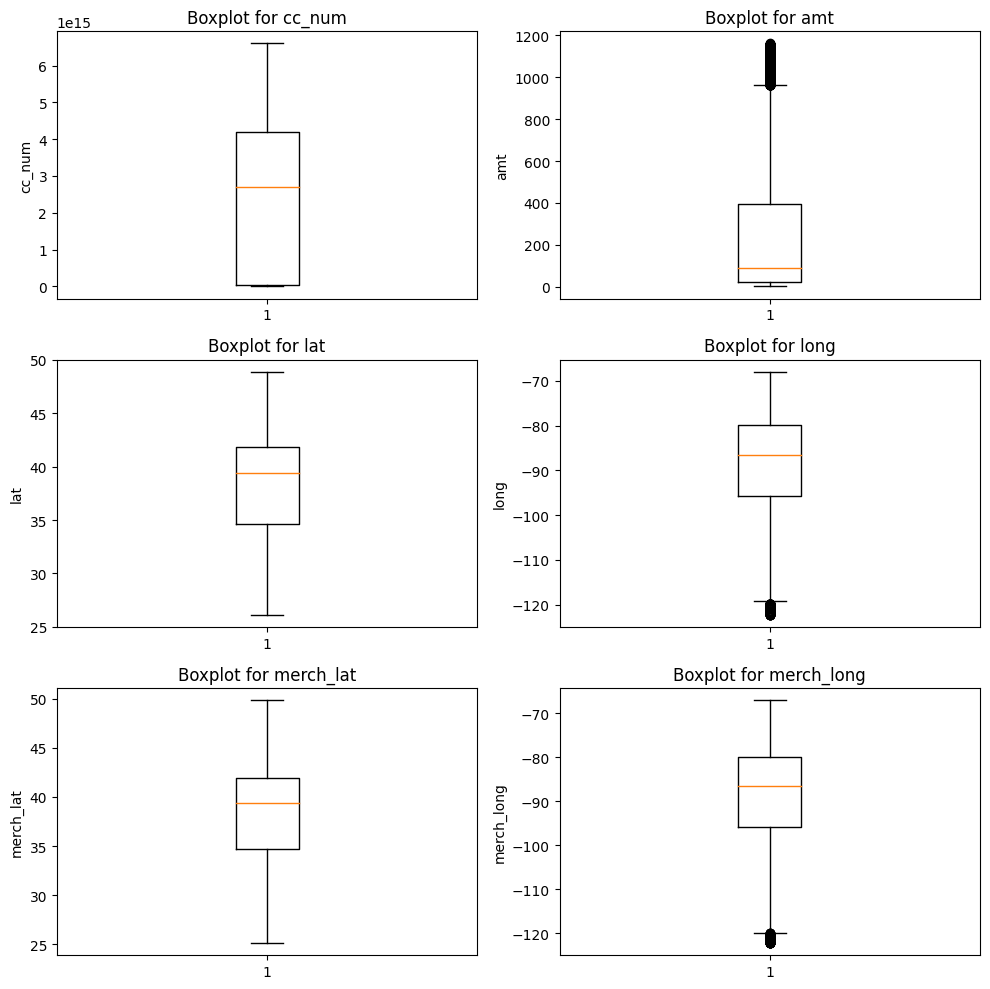

In [ ]:
plotting = ['cc_num', 'amt', 'lat', 'long', 'merch_lat', 'merch_long']
num_plots = len(plotting)
num_rows = int((num_plots + 1) / 2)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column in enumerate(plotting):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.boxplot(df_no_outliers[column])
    ax.set_title(f'Boxplot for {column}')
    ax.set_ylabel(column)

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

Most of the outliers have been removed from our data as shown from the new boxplots.

## Data Splitting

Let's split our data into three sets that we can use to make the model functional.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop(columns=['is_fraud'])
y = df_no_outliers['is_fraud']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (9137, 6)
Validation set shape: (1958, 6)
Testing set shape: (1959, 6)


Now that we have our sets, let's feed the training data into the model and then validate that it is functional.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train, y_train)

y_valid_pred = rf_classifier.predict(X_valid)

accuracy = accuracy_score(y_valid, y_valid_pred)
report = classification_report(y_valid, y_valid_pred)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.898876404494382
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       989
           1       0.90      0.90      0.90       969

    accuracy                           0.90      1958
   macro avg       0.90      0.90      0.90      1958
weighted avg       0.90      0.90      0.90      1958

Confusion Matrix:
 [[888 101]
 [ 97 872]]


The model retains a score of 0.90 across the board for fraudulent and true transactions confirming that it is functional.

In [ ]:
y_test_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8922919857069934
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1016
           1       0.89      0.88      0.89       943

    accuracy                           0.89      1959
   macro avg       0.89      0.89      0.89      1959
weighted avg       0.89      0.89      0.89      1959

Confusion Matrix:
 [[917  99]
 [112 831]]


Running the test data against the model, we can see that it retains an f1-score of around 0.90 for both types of transactions.

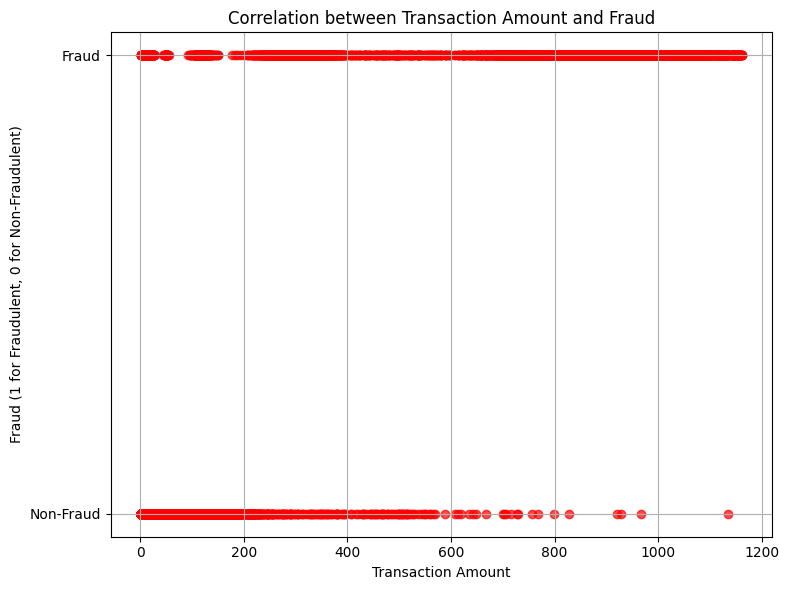

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['amt'], df_no_outliers['is_fraud'], color='red', marker='o', alpha=0.7)

plt.xlabel('Transaction Amount')
plt.ylabel('Fraud (1 for Fraudulent, 0 for Non-Fraudulent)')
plt.title('Correlation between Transaction Amount and Fraud')

plt.yticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print("Check transactions")
decision = input("Import a CSV or manually type in values?(Import|Manual|Quit): ")
if(decision == 'Manual'):
  transactionCount = int(input("How many transactions do you want to check?: "))
  ccNumbers = []
  amounts = []
  lats = []
  longs = []
  mlats = []
  mlongs = []

  for i in range(transactionCount):
      ccNumbers.append(int(input("Enter next cc number: ")))
  for i in range(transactionCount):
      amounts.append(float(input("Enter next amount: ")))
  for i in range(transactionCount):
      lats.append(float(input("Enter next latitude: ")))
  for i in range(transactionCount):
      longs.append(float(input("Enter next longitude: ")))
  for i in range(transactionCount):
      mlats.append(float(input("Enter next mechant latitude: ")))
  for i in range(transactionCount):
      mlongs.append(float(input("Enter next merchant longitude: ")))

  data = {'cc_num':ccNumbers,
          'amt':amounts,
          'lat':lats,
          'long':longs,
          'merch_lat':mlats,
          'merch_long':mlongs
        }
  dnf = pd.DataFrame(data)

  new_pred = rf_classifier.predict(dnf)

  for x in range(len(new_pred)):
      if(new_pred[x] == 1):
          print("Transaction #" + str(x + 1) + " is fraudulent.")
      else:
          print("Transaction #" + str(x + 1) + " is real.")
elif(decision == 'Import'):
  uploaded = files.upload()
  df = pd.read_csv('fraudTest.csv', encoding='latin-1')
elif(decision == 'Quit'):
  print("Quitting...")
else:
  print("Quitting...")

Check transactions
Import a CSV or manually type in values?(Import|Manual|Quit): Quit
Quitting...
